In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [3]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

## Plotting Hockey

Kl constraint, $\epsilon = 0.01$: 

In [199]:
def plot_mpo_hockey(filenames):
    all_win_rates = []
    all_rewards = []
    all_kl_divs = []
    all_steps = []
    all_critic_losses = []
    all_actor_losses = []

    for filename in filenames:
        with open(filename, "r") as f:
            results = json.load(f)
            all_rewards.append(results["all_rewards"])
            all_kl_divs.append(results["all_kl"][:9851])
            all_steps.append(results["all_steps"][:9851])
            all_critic_losses.append(results["all_critic_losses"][:9851])
            all_actor_losses.append(results["all_actor_losses"][:9851])
            all_win_rates.append(results["val_opponent_metrics"])

    num_validations = len(all_win_rates[0])  # Number of validation checkpoints
    opponent_names = list(all_win_rates[0][0].keys())  # List of opponents

    # Initialize a dictionary to store win rates for each opponent across runs
    win_rate_dict = {opp: [] for opp in opponent_names}

    # Collect win rates for each opponent
    for run in all_win_rates:
        for opp in opponent_names:
            win_rate_values = [iteration.get(opp, {}).get("win_rate", 0) for iteration in run]
            win_rate_dict[opp].append(win_rate_values)

    plt.figure(figsize=(33, 5))

    plt.subplot(1, 4, 4)
    # Compute mean and std for each opponent
    for opp in opponent_names:
        win_rate_array = np.array(win_rate_dict[opp])  # Shape: (num_runs, num_validations)
        mean_win_rate = np.mean(win_rate_array, axis=0)
        std_win_rate = np.std(win_rate_array, axis=0)

        x_values = np.arange(1, num_validations + 1)

        plt.plot(x_values, mean_win_rate, label=opp)
        plt.fill_between(x_values, mean_win_rate - std_win_rate, mean_win_rate + std_win_rate, alpha=0.3)
        
    plt.xlabel("Validation (every 100 episodes)")
    plt.ylabel("Win Rate")
    plt.legend()
    plt.grid()
    plt.text(-0.1, 1.1, "D", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    
    plt.subplot(1, 4, 3)
    rewards_mean = moving_average(np.mean(all_rewards, axis=0), window_size=20)
    rewards_std = moving_average(np.std(all_rewards, axis=0), window_size=20)
    plt.plot(np.arange(1, len(rewards_mean) + 1), rewards_mean)
    plt.fill_between(np.arange(1, len(rewards_mean) + 1), rewards_mean - rewards_std, rewards_mean + rewards_std, alpha=0.3)
    plt.xlabel("Episode")
    plt.ylabel("Smoothed Reward")
    plt.grid()
    plt.text(-0.1, 1.1, "C", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    
    plt.subplot(1, 4, 1)
    critic_losses_mean = np.mean(all_critic_losses, axis=0)
    critic_losses_std = np.std(all_critic_losses, axis=0)
    plt.plot(np.arange(1, len(critic_losses_mean) + 1), critic_losses_mean)
    plt.fill_between(np.arange(1, len(critic_losses_mean) + 1), critic_losses_mean - critic_losses_std, critic_losses_mean + critic_losses_std, alpha=0.3)
    plt.xlabel("Episode")
    plt.ylabel("Critic Loss")
    plt.grid()
    plt.text(-0.1, 1.1, "A", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
    
    
    plt.subplot(1, 4, 2)
    actor_losses_mean = np.mean(all_actor_losses, axis=0)
    actor_losses_std = np.std(all_actor_losses, axis=0)
    plt.plot(np.arange(1, len(actor_losses_mean) + 1), actor_losses_mean)
    plt.fill_between(np.arange(1, len(actor_losses_mean) + 1), actor_losses_mean - actor_losses_std, actor_losses_mean + actor_losses_std, alpha=0.3)
    plt.xlabel("Episode")
    plt.ylabel("Actor Loss")
    plt.grid()
    plt.text(-0.1, 1.1, "B", transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

    plt.show()

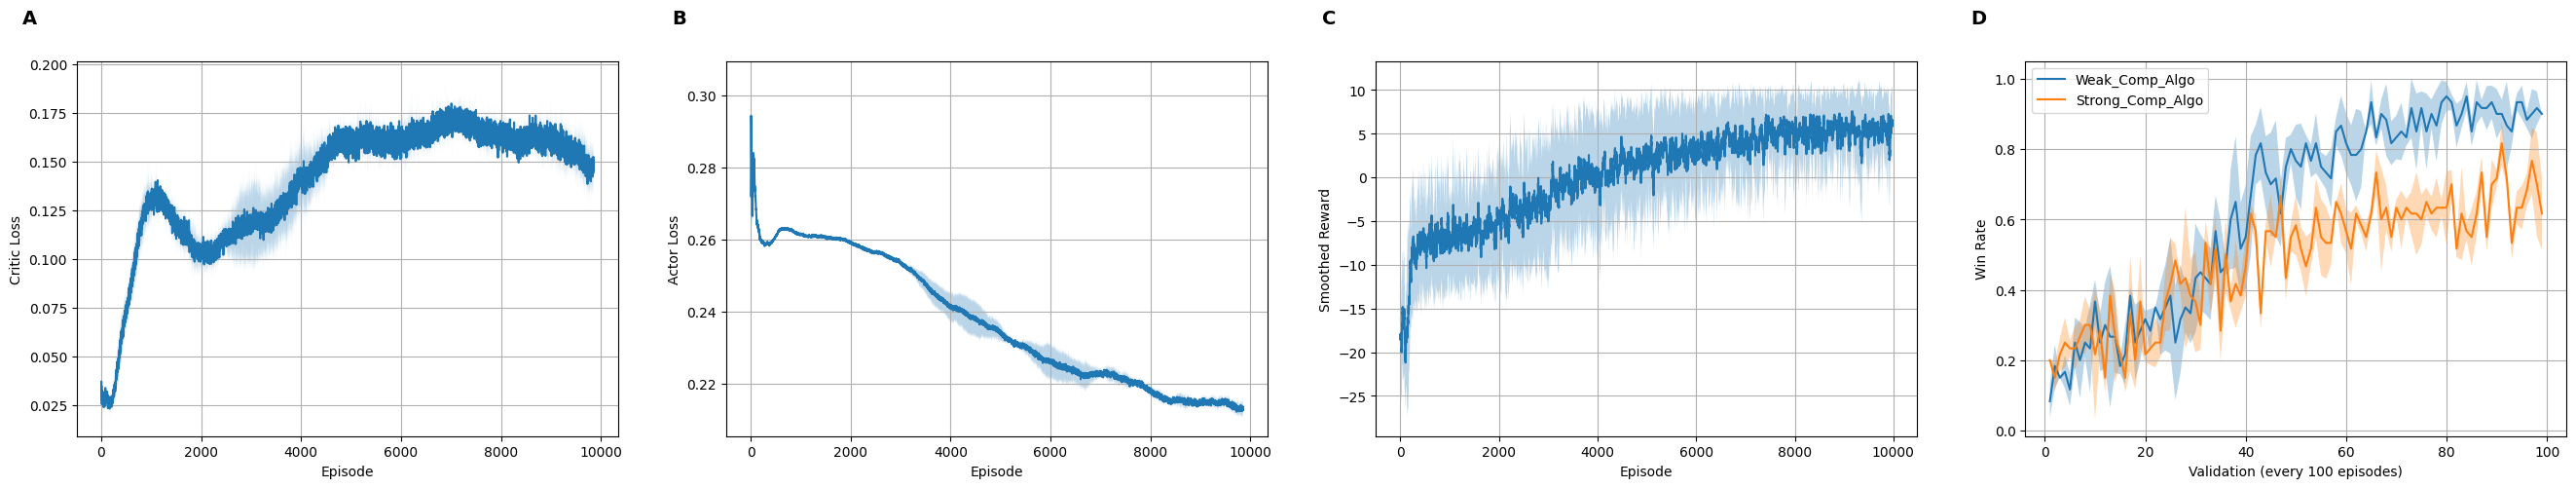

In [200]:
filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/hockey_{i}.json" for i in range(1, 4)]
plot_mpo_hockey(filenames)

No Kl Constraint:

In [23]:
def plot_mpo_hockey(filenames):
    all_win_rates = []

    for filename in filenames:
        with open(filename, "r") as f:
            results = json.load(f)
            all_win_rates.append(results["val_opponent_metrics"])

    num_validations = len(all_win_rates[0])  # Number of validation checkpoints
    opponent_names = list(all_win_rates[0][0].keys())  # List of opponents

    # Initialize a dictionary to store win rates for each opponent across runs
    win_rate_dict = {opp: [] for opp in opponent_names}

    # Collect win rates for each opponent
    for run in all_win_rates:
        for opp in opponent_names:
            win_rate_values = [iteration.get(opp, {}).get("win_rate", 0) for iteration in run]
            win_rate_dict[opp].append(win_rate_values)

    plt.figure(figsize=(5, 3))

    # Compute mean and std for each opponent
    for opp in opponent_names:
        win_rate_array = np.array(win_rate_dict[opp])  # Shape: (num_runs, num_validations)
        mean_win_rate = np.mean(win_rate_array, axis=0)
        std_win_rate = np.std(win_rate_array, axis=0)

        x_values = np.arange(1, num_validations + 1)

        plt.plot(x_values, mean_win_rate, label=opp)
        plt.fill_between(x_values, mean_win_rate - std_win_rate, mean_win_rate + std_win_rate, alpha=0.2)

    plt.title(r"No Kl constraint")
    plt.xlabel("Validation (every 100 episodes)")
    plt.ylabel("Win Rate")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


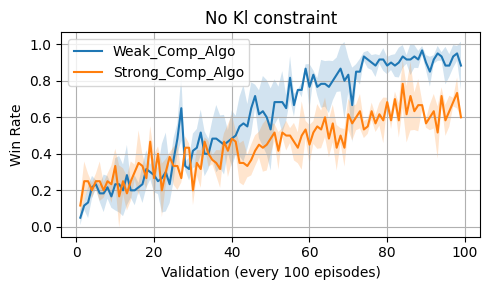

In [24]:
filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/hockey_no_kl_{i}.json" for i in range(1, 4)]
plot_mpo_hockey(filenames)

With Kl constraint:

In [164]:
def plot_mpo_hockey(filenames):
    all_win_rates = []

    for filename in filenames:
        with open(filename, "r") as f:
            results = json.load(f)
            all_win_rates.append(results["val_opponent_metrics"])

    num_validations = len(all_win_rates[0])  # Number of validation checkpoints
    opponent_names = list(all_win_rates[0][0].keys())  # List of opponents

    # Initialize a dictionary to store win rates for each opponent across runs
    win_rate_dict = {opp: [] for opp in opponent_names}

    # Collect win rates for each opponent
    for run in all_win_rates:
        for opp in opponent_names:
            win_rate_values = [iteration.get(opp, {}).get("win_rate", 0) for iteration in run]
            win_rate_dict[opp].append(win_rate_values)

    plt.figure(figsize=(5, 3))

    # Compute mean and std for each opponent
    for opp in opponent_names:
        win_rate_array = np.array(win_rate_dict[opp])  # Shape: (num_runs, num_validations)
        mean_win_rate = np.mean(win_rate_array, axis=0)
        std_win_rate = np.std(win_rate_array, axis=0)

        x_values = np.arange(1, num_validations + 1)

        plt.plot(x_values, mean_win_rate, label=opp)
        plt.fill_between(x_values, mean_win_rate - std_win_rate, mean_win_rate + std_win_rate, alpha=0.2)

    plt.title(r"$\epsilon_\pi = 0.01$")
    plt.xlabel("Validation (every 100 episodes)")
    plt.ylabel("Win Rate")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

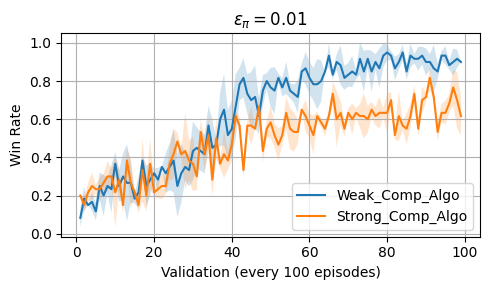

In [165]:
filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/hockey_{i}.json" for i in range(1, 4)]
plot_mpo_hockey(filenames)

With or without ICM:

In [8]:
def plot_mpo_hockey(filenames):
    all_win_rates = []

    for filename in filenames:
        with open(filename, "r") as f:
            results = json.load(f)
            all_win_rates.append(results["val_opponent_metrics"])

    num_validations = len(all_win_rates[0])  # Number of validation checkpoints
    opponent_names = list(all_win_rates[0][0].keys())  # List of opponents

    # Initialize a dictionary to store win rates for each opponent across runs
    win_rate_dict = {opp: [] for opp in opponent_names}

    # Collect win rates for each opponent
    for run in all_win_rates:
        for opp in opponent_names:
            win_rate_values = [iteration.get(opp, {}).get("win_rate", 0) for iteration in run]
            win_rate_dict[opp].append(win_rate_values)

    plt.figure(figsize=(6, 5))

    # Compute mean and std for each opponent
    for opp in opponent_names:
        win_rate_array = np.array(win_rate_dict[opp])  # Shape: (num_runs, num_validations)
        mean_win_rate = np.mean(win_rate_array, axis=0)
        std_win_rate = np.std(win_rate_array, axis=0)

        x_values = np.arange(1, num_validations + 1)

        plt.plot(x_values, mean_win_rate, label=opp)
        plt.fill_between(x_values, mean_win_rate - std_win_rate, mean_win_rate + std_win_rate, alpha=0.2)

    plt.title(r"$\epsilon_{\pi}=0.01$, Curiosity=0.01")
    plt.xlabel("Validation (every 100 episodes)")
    plt.ylabel("Win Rate")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

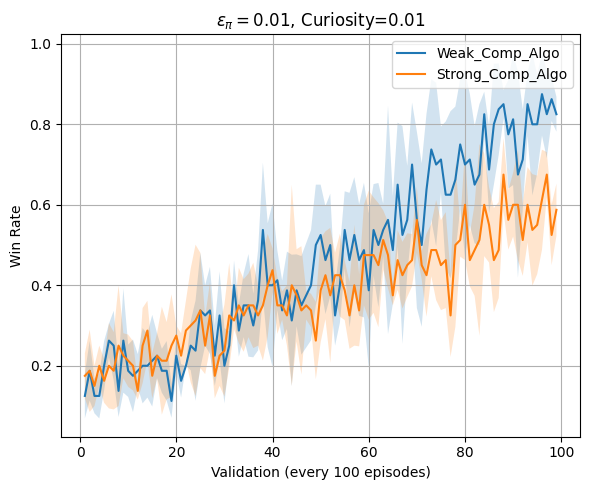

In [9]:
filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/hockey_icm_{i}.json" for i in range(1, 5)]
plot_mpo_hockey(filenames)

## Plotting Pendulum

Continuous vs discrete action space

In [215]:
def plot_mpo_pendulum_disc_cont(disc_filenames, cont_filenames):
    
    all_disc_rewards = []
    all_cont_rewards = []
    for disc_filename in disc_filenames:
        with open(disc_filename, "r") as f:
            disc_results = json.load(f)
            disc_rewards = moving_average(disc_results["all_rewards"], window_size = 20)
            all_disc_rewards.append(disc_rewards)
    
    for cont_filename in cont_filenames:
        with open(cont_filename, "r") as f:
            cont_results = json.load(f)
            cont_rewards = moving_average(cont_results["all_rewards"], window_size = 20)
            all_cont_rewards.append(cont_rewards)
    
    # Create the plot
    plt.figure(figsize=(3.5, 2.5))
    disc_mean = np.mean(all_disc_rewards, axis=0)
    cont_mean = np.mean(all_cont_rewards, axis=0)
    disc_std = np.std(all_disc_rewards, axis=0)
    cont_std = np.std(all_cont_rewards, axis=0)
    
    plt.plot(np.arange(1, len(disc_mean) + 1), disc_mean, label="Discrete")
    plt.fill_between(np.arange(1, len(disc_mean) + 1), disc_mean - disc_std, disc_mean + disc_std, alpha = 0.3)
    plt.plot(np.arange(1, len(cont_mean) + 1), cont_mean, label="Continuous")
    plt.fill_between(np.arange(1, len(cont_mean) + 1), cont_mean - cont_std, cont_mean + cont_std, alpha = 0.3)

    plt.xlabel("Episode")
    plt.ylabel("Smoothed Reward")
    plt.title("Pendulum")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

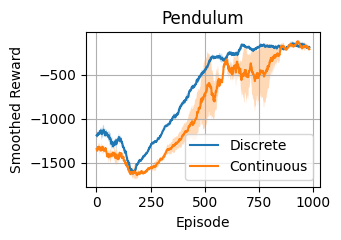

In [216]:
disc_filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/pendulum_disc_{i}.json" for i in range(1, 5)]
cont_filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/pendulum_cont_{i}.json" for i in range(9, 11)]
plot_mpo_pendulum_disc_cont(disc_filenames, cont_filenames)


Discount = $0.99$, $5$ agents trained each
- Cont: $N = 32$ actions sampled

## Plotting Halfcheetah

In [12]:
def plot_mpo_hc_disc_cont(cont_filename: str, disc_filename: str):
    
    # Load the saved training metrics
    with open(disc_filename, "r") as f:
        disc_results = json.load(f)
    
    with open(cont_filename, "r") as f:
        cont_results = json.load(f)
        
    # Extract rewards
    disc_rewards = moving_average(disc_results["all_rewards"], window_size=100)[:8000]
    cont_rewards = moving_average(cont_results["all_rewards"], window_size=100)[:8000]
    
    # Create the plot
    plt.figure(figsize=(6, 5))
    
    plt.plot(np.arange(1, len(disc_rewards) + 1), disc_rewards, marker='o', color='blue', label='Discrete')
    plt.plot(np.arange(1, len(cont_rewards) + 1), cont_rewards, marker='o', color='red', label='Continuous')

    plt.xlabel("Episode")
    plt.ylabel("Smoothed Reward")
    plt.title("Half Cheetah")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

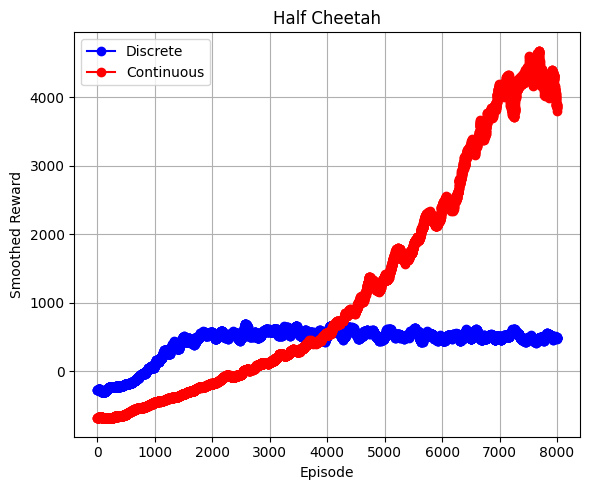

In [13]:
plot_mpo_hc_disc_cont("/Users/andrepfrommer/Desktop/Project_RL/output/json_files/halfcheetah_cont_25-02-19 16_35_06_000100000.json",
    "/Users/andrepfrommer/Desktop/Project_RL/output/json_files/halfcheetah_disc_25-02-19 14_25_19_000100000.json")

## Plotting Lunar Lander 

In [213]:
def plot_mpo_ll_disc_cont(disc_filenames, cont_filenames):
    
    all_disc_rewards = []
    all_cont_rewards = []
    for disc_filename in disc_filenames:
        with open(disc_filename, "r") as f:
            disc_results = json.load(f)
            disc_rewards = moving_average(disc_results["all_rewards"], window_size = 20)
            all_disc_rewards.append(disc_rewards)
    
    for cont_filename in cont_filenames:
        with open(cont_filename, "r") as f:
            cont_results = json.load(f)
            cont_rewards = moving_average(cont_results["all_rewards"], window_size = 20)
            all_cont_rewards.append(cont_rewards)
    
    # Create the plot
    plt.figure(figsize=(3.5, 2.5))
    disc_mean = np.mean(all_disc_rewards, axis=0)
    cont_mean = np.mean(all_cont_rewards, axis=0)
    disc_std = np.std(all_disc_rewards, axis=0)
    cont_std = np.std(all_cont_rewards, axis=0)
    
    plt.plot(np.arange(1, len(disc_mean) + 1), disc_mean, label="Discrete")
    plt.fill_between(np.arange(1, len(disc_mean) + 1), disc_mean - disc_std, disc_mean + disc_std, alpha = 0.3)
    plt.plot(np.arange(1, len(cont_mean) + 1), cont_mean, label="Continuous")
    plt.fill_between(np.arange(1, len(cont_mean) + 1), cont_mean - cont_std, cont_mean + cont_std, alpha = 0.3)

    plt.xlabel("Episode")
    plt.ylabel("Smoothed Reward")
    plt.title("Lunarlander")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()

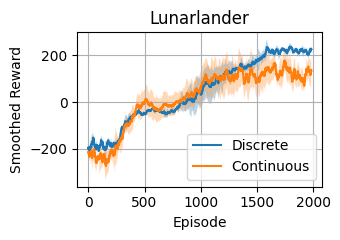

In [214]:
disc_filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/lunarlander_disc_{i}.json" for i in range(1, 5)]
cont_filenames = [f"/Users/andrepfrommer/Desktop/Project_RL/output/json_files/lunarlander_cont_{i}.json" for i in range(1, 5)]
plot_mpo_ll_disc_cont(disc_filenames, cont_filenames)

Disc: 4 discrete actions

Cont: N = 32 actions drawn
